In [1]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling._smote import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
df = pd.read_csv('bank.csv',delimiter=';', encoding='utf-8', header=0,index_col=None)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(df.describe(include="all"))
print(df.isnull().sum())

                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41188     41

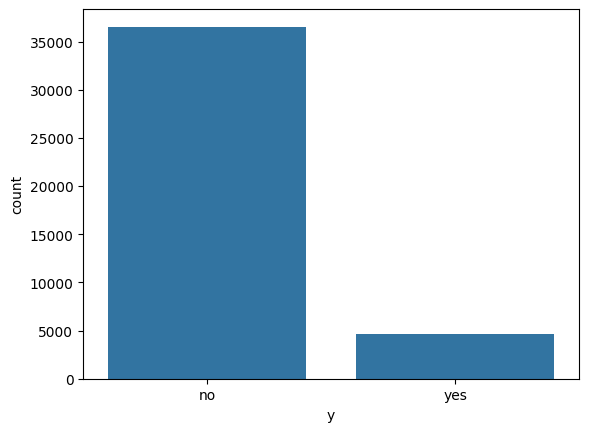

In [ ]:
# Visualize the data
sns.countplot(data=df, x='y')
plt.show()

Text(0, 0.5, 'No. of Clients')

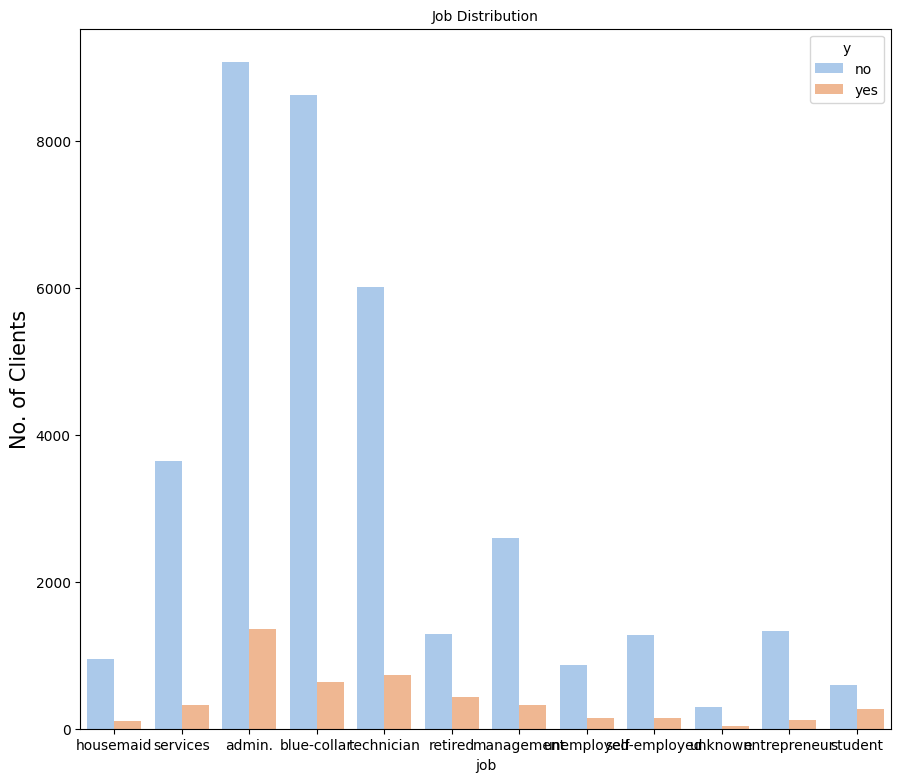

In [ ]:
plt.figure(figsize=(23,20))
plt.subplot(221)
sns.countplot(data=df, x='job', hue='y', palette='pastel')
plt.title('Job Distribution', size=10)
plt.ylabel('No. of Clients', size=15)

Text(0.5, 1.0, 'Marital Distribution')

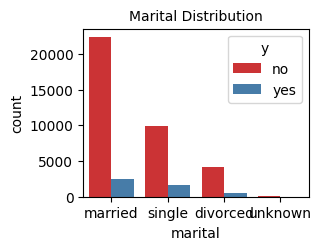

In [ ]:
plt.subplot(222)
sns.countplot(data=df, x='marital', hue='y', palette='Set1')
plt.title('Marital Distribution', size=10)

Text(0, 0.5, 'No. of Clients')

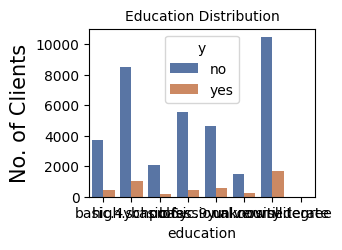

In [ ]:
plt.subplot(223)
sns.countplot(data=df, x='education', hue='y', palette='deep')
plt.title('Education Distribution', size=10)
plt.ylabel('No. of Clients', size=15)

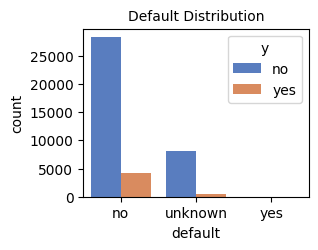

In [ ]:
plt.subplot(224)
sns.countplot(data=df, x='default', hue='y', palette='muted')
plt.title('Default Distribution', size=10)

plt.show()

In [ ]:
# Preprocess the data
df.drop(["education", "contact", "month", "day_of_week"], axis=1, inplace=True)


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = le.fit_transform(df[x])

In [ ]:
# Split the data into training and testing sets
X = df.values[:, 0:-1]
Y = df.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


In [ ]:
# Oversample the minority class
sm = SMOTE(random_state=10, k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [ ]:
# Train and evaluate logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)
Y_pred = logreg.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[9364 1571]
 [ 224 1198]]
0.8547382050659545
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91     10935
         1.0       0.43      0.84      0.57      1422

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.91      0.85      0.87     12357



In [ ]:
# Train and evaluate decision tree model
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_res, Y_train_res)
Y_pred = dt.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10185   750]
 [  682   740]]
0.8841142672169621
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     10935
         1.0       0.50      0.52      0.51      1422

    accuracy                           0.88     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.88      0.89     12357



In [ ]:
# Train and evaluate random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train_res, Y_train_res)
Y_pred = rf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10413   522]
 [  618   804]]
0.9077445982034474
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     10935
         1.0       0.61      0.57      0.59      1422

    accuracy                           0.91     12357
   macro avg       0.78      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'min_samples_leaf': [2, 4, 5],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_res, Y_train_res)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9365186561871279


In [26]:
# Evaluate the tuned model
Y_pred = grid_search.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[10274   661]
 [  487   935]]
0.9070971918750506
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     10935
         1.0       0.59      0.66      0.62      1422

    accuracy                           0.91     12357
   macro avg       0.77      0.80      0.78     12357
weighted avg       0.91      0.91      0.91     12357



In [27]:
# Tabulate the results
df_tab = pd.DataFrame()
df_tab['Model_name'] = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Tuned Random Forest']
df_tab['Accuracies'] = [accuracy_score(Y_test, logreg.predict(X_test))*100,
                        accuracy_score(Y_test, dt.predict(X_test))*100,
                        accuracy_score(Y_test, rf.predict(X_test))*100,
                        accuracy_score(Y_test, grid_search.predict(X_test))*100]

In [28]:
df_tab.sort_values("Accuracies", ascending=False)

,Model_name,Accuracies
2,Random Forest,90.774460
3,Tuned Random Forest,90.709719
1,Decision Trees,88.411427
0,Logistic Regression,85.473821


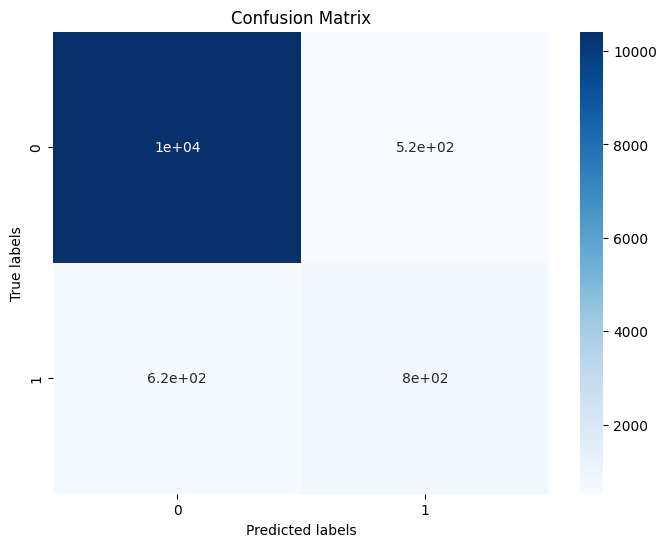

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     10935
         1.0       0.61      0.57      0.59      1422

    accuracy                           0.91     12357
   macro avg       0.78      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



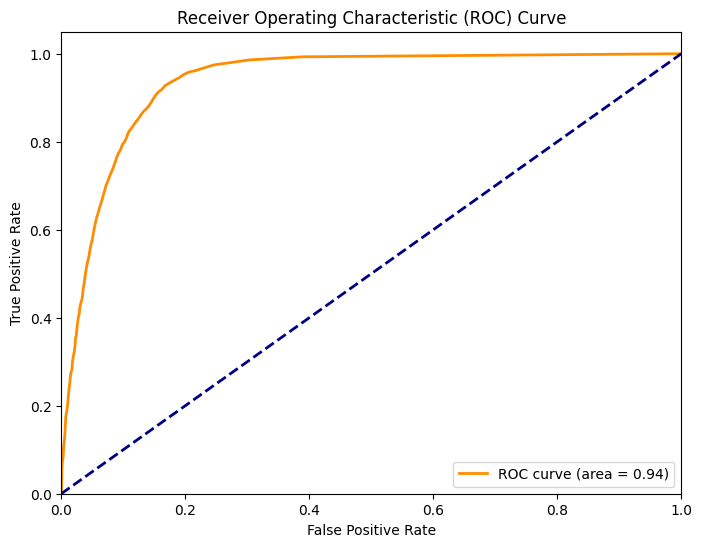

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
Y_pred = rf.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(Y_test, Y_pred))

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()